In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
!ls ~/DAOPHOT/daophot4

Makefile       daomatch       f187n.lst      f444w.psf      mathsubs.f
Makefile.linux daomatch.f     f187n.nei      f444ws.fits    mathsubs.o
Makefile.mac   daomatch.o     f187n.psf      f470n.als      montage2.f
Makefile.unix  daophot        f187ns.fits    f470n.ap       newtrial.f
NGC_3324       daophot.f      f200w.als      f470n.coo      ngc3324.mag
README.txt     daophot.o      f200w.ap       f470n.fits     ngc3324.mch
addstar.f      daophot.opt    f200w.coo      f470n.lst      ngc3324.raw
addstar.o      daophotii.ps   f200w.fits     f470n.nei      nstar.f
airmass.f      daophotii.tex  f200w.lst      f470n.psf      nstar.o
allframe.f     dummysm.f      f200w.nei      f470ns.fits    pckpsf.f
allstar        dummysm.o      f200w.psf      f770w.fits     pckpsf.o
allstar.f      f090w.als      f200ws.fits    find.f         peak.f
allstar.o      f090w.ap       f335m.als      find.o         peak.o
allstar.opt    f090w.coo      f335m.ap       fitsubs.f      photo.opt
allstsubs.f    f090w.f

8756


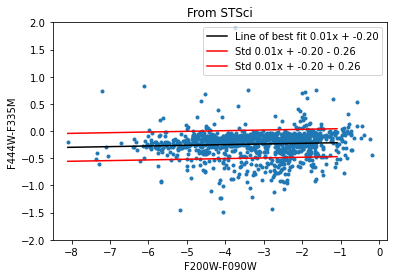

In [312]:
jwst = pd.read_csv("CC_Catalog_May112023.csv")
print(len(jwst))
jwst_pl = jwst.dropna(subset=['isophotal_vegamag_f090w','isophotal_vegamag_f200w','isophotal_vegamag_f335m','isophotal_vegamag_f444w'])
col_x_j = jwst_pl.isophotal_vegamag_f200w-jwst_pl.isophotal_vegamag_f090w
col_y_j = jwst_pl.isophotal_vegamag_f444w-jwst_pl.isophotal_vegamag_f335m

lin_fit = np.polyfit(col_x_j, col_y_j, 1)

xlim = np.arange(min(col_x_j),max(col_x_j),1)
plt.plot(col_x_j, col_y_j,'.')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1], 'k', label=f'Line of best fit {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] - np.std(col_y_j), 'r',  label=f'Std {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f} - {np.std(col_y_j):4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] + np.std(col_y_j), 'r',  label=f'Std {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f} + {np.std(col_y_j):4.2f}')
# plt.plot(jwst.isophotal_vegamag_f200w-jwst.isophotal_vegamag_f090w, jwst.isophotal_vegamag_f444w-jwst.isophotal_vegamag_f335m,'.')
plt.xlabel('F200W-F090W')
plt.ylabel('F444W-F335M')

plt.ylim(-2,2)
plt.title('From STSci')
plt.savefig('./Figures/DAOPHOT_Comp_StSci.png',spi=300)
plt.legend()

In [150]:
head = ['Index','x','y','f200w','e_f200w','f090w','e_f090w','f187n','e_f187n','f335m','e_f335m','f444w','e_f444w','f470n','e_f470n']
dao = pd.read_csv("~/DAOPHOT/daophot4/ngc3324_for_py.raw", header=None,delim_whitespace=True, comment='#',names=head).iloc[::2, :]
dao.set_index('Index',inplace=True)
dao

,x,y,f200w,e_f200w,f090w,e_f090w,f187n,e_f187n,f335m,e_f335m,f444w,e_f444w,f470n,e_f470n
Index,,,,,,,,,,,,,,
1.0,84.624,6063.185,14.9200,0.2020,99.9999,9.9999,99.9999,9.9999,15.5420,0.1593,15.8890,0.2234,99.9999,9.9999
2.0,89.420,6051.155,99.9999,9.9999,99.9999,9.9999,17.2240,0.0993,99.9999,9.9999,17.1460,0.1418,17.5380,0.0806
3.0,90.610,6063.732,16.4510,0.1996,99.9999,9.9999,17.1880,0.1252,99.9999,9.9999,99.9999,9.9999,16.0120,0.1297
4.0,91.523,4237.692,16.3600,0.0800,18.2830,0.0507,99.9999,9.9999,18.2890,0.0341,18.6570,0.0183,99.9999,9.9999
5.0,101.683,6064.138,99.9999,9.9999,99.9999,9.9999,14.2510,0.2260,99.9999,9.9999,17.5010,0.1499,17.4590,0.1216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440.0,14369.210,1588.765,17.1260,0.0344,99.9999,9.9999,18.2960,0.0944,18.8860,0.0339,19.2540,0.0234,99.9999,9.9999
4441.0,14380.240,1923.570,15.6460,0.0462,18.6260,0.0981,18.4820,0.2517,17.6810,0.0166,18.0520,0.0203,18.1290,0.0189
4442.0,14386.700,691.272,16.6220,0.0637,99.9999,9.9999,17.4660,0.0813,18.3980,0.0297,18.6500,0.0182,18.7350,0.0303


In [151]:
dao.where(dao!=99.9999, np.nan,inplace=True)
dao.where(dao!=9.9999, np.nan,inplace=True)
dao

,x,y,f200w,e_f200w,f090w,e_f090w,f187n,e_f187n,f335m,e_f335m,f444w,e_f444w,f470n,e_f470n
Index,,,,,,,,,,,,,,
1.0,84.624,6063.185,14.920,0.2020,NaN,NaN,NaN,NaN,15.542,0.1593,15.889,0.2234,NaN,NaN
2.0,89.420,6051.155,NaN,NaN,NaN,NaN,17.224,0.0993,NaN,NaN,17.146,0.1418,17.538,0.0806
3.0,90.610,6063.732,16.451,0.1996,NaN,NaN,17.188,0.1252,NaN,NaN,NaN,NaN,16.012,0.1297
4.0,91.523,4237.692,16.360,0.0800,18.283,0.0507,NaN,NaN,18.289,0.0341,18.657,0.0183,NaN,NaN
5.0,101.683,6064.138,NaN,NaN,NaN,NaN,14.251,0.2260,NaN,NaN,17.501,0.1499,17.459,0.1216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440.0,14369.210,1588.765,17.126,0.0344,NaN,NaN,18.296,0.0944,18.886,0.0339,19.254,0.0234,NaN,NaN
4441.0,14380.240,1923.570,15.646,0.0462,18.626,0.0981,18.482,0.2517,17.681,0.0166,18.052,0.0203,18.129,0.0189
4442.0,14386.700,691.272,16.622,0.0637,NaN,NaN,17.466,0.0813,18.398,0.0297,18.650,0.0182,18.735,0.0303


(-2.0, 2.0)

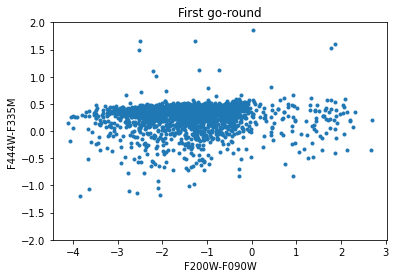

In [154]:
plt.plot(dao.f200w-dao.f090w, dao.f444w-dao.f335m,'.')
plt.xlabel('F200W-F090W')
plt.ylabel('F444W-F335M')
plt.title('First go-round')

plt.ylim(-2,2)
# plt.savefig('./Figures/DAOPHOT_Check_1.png',dpi=300)

In [322]:
# Run 2
head = ['Index','x','y','f200w','e_f200w','f090w','e_f090w','f187n','e_f187n','f335m','e_f335m','f444w','e_f444w','f470n','e_f470n']
dao = pd.read_csv("~/DAOPHOT/daophot4/ngc3324_3.raw", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
dao.set_index('Index',inplace=True)
dao.where(dao!=99.9999, np.nan,inplace=True)
dao.where(dao!=9.9999, np.nan,inplace=True)
dao

,x,y,f200w,e_f200w,f090w,e_f090w,f187n,e_f187n,f335m,e_f335m,f444w,e_f444w,f470n,e_f470n
Index,,,,,,,,,,,,,,
1.0,19.463,5268.275,16.919,0.0264,17.499,0.0638,16.958,0.0783,NaN,NaN,NaN,NaN,NaN,NaN
2.0,39.102,6697.870,17.285,0.0455,18.977,0.0825,17.135,0.0738,NaN,NaN,NaN,NaN,NaN,NaN
3.0,48.946,7729.819,16.890,0.0420,18.568,0.0623,16.812,0.0441,NaN,NaN,NaN,NaN,NaN,NaN
4.0,49.382,5303.816,16.559,0.0486,18.785,0.0509,16.463,0.0403,NaN,NaN,NaN,NaN,NaN,NaN
5.0,61.449,8041.913,16.162,0.0388,18.462,0.0348,16.227,0.0371,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257.0,14369.250,1588.764,17.130,0.0338,NaN,NaN,NaN,NaN,18.889,0.0341,19.243,0.0241,NaN,NaN
4258.0,14380.220,1923.491,15.651,0.0457,NaN,NaN,NaN,NaN,17.683,0.0153,18.044,0.0154,18.133,0.0190
4259.0,14386.750,691.076,16.629,0.0640,NaN,NaN,NaN,NaN,18.400,0.0281,18.640,0.0169,18.739,0.0305


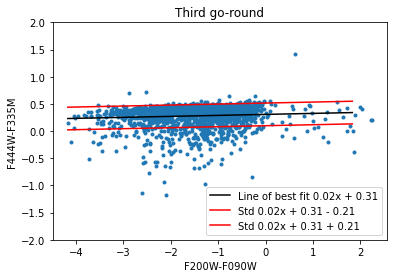

In [313]:
dao_pl  = dao[['f090w','f200w','f335m','f444w']].dropna(subset=['f090w','f200w','f335m','f444w'])
col_x = dao_pl.f200w-dao_pl.f090w
col_y = dao_pl.f444w-dao_pl.f335m

lin_fit = np.polyfit(col_x, col_y, 1)

xlim = np.arange(min(col_x),max(col_x),1)
plt.plot(dao.f200w-dao.f090w, dao.f444w-dao.f335m,'.')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1], 'k', label=f'Line of best fit {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] - np.std(col_y), 'r',  label=f'Std {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f} - {np.std(col_y):4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] + np.std(col_y), 'r',  label=f'Std {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f} + {np.std(col_y):4.2f}')
plt.xlabel('F200W-F090W')
plt.ylabel('F444W-F335M')
plt.title('Third go-round')
plt.legend()
plt.ylim(-2,2)
# plt.savefig('./Figures/DAOPHOT_Check_3.png',dpi=300)

In [314]:

from astropy.io import fits
import astropy.wcs as wcs
import warnings
warnings.filterwarnings('ignore')

hdu = fits.open("/Users/breannacrompvoets/DAOPHOT/daophot4/f200w.fits")
w_jwst = wcs.WCS(hdu[0].header)

In [323]:

# dao['RA'] = [np.nan]*len(dao)
# dao['DEC'] = [np.nan]*len(dao)
dao['SkyCoords'] = w_jwst.pixel_to_world(dao.x,dao.y)
# dao['RA'] = SkyCoords_tmp_dao.ra
# dao['DEC'] = SkyCoords_tmp_dao.dec/u.deg

In [324]:
dao.to_csv('DAOPHOT_Catalog_3.csv')

In [278]:

import astropy.units as u

dao.columns

Index(['x', 'y', 'f200w', 'e_f200w', 'f090w', 'e_f090w', 'f187n', 'e_f187n',
       'f335m', 'e_f335m', 'f444w', 'e_f444w', 'f470n', 'e_f470n', 'RA',
       'DEC'],
      dtype='object')

In [281]:
from astropy.table import Table
unts = {'x':'pix','y':'pix','f200w':u.mag,'e_f200w':u.mag,'f090w':u.mag,'e_f090w':u.mag,\
    'f187n':u.mag,'e_f187n':u.mag,'f335m':u.mag,'e_f335m':u.mag,'f444w':u.mag,'e_f444w':u.mag,\
        'f470n':u.mag,'e_f470n':u.mag,'RA':u.deg,'DEC':u.deg}
dao_tab = Table.from_pandas(dao,units=unts)
from astropy.io.votable import from_table, writeto
dao_votab = from_table(dao_tab)

writeto(dao_votab, "/Users/breannacrompvoets/DAOPHOT/daophot4/DAOPHOT_Version_3.xml")

In [138]:
dao_tab

x,y,f200w,e_f200w,f090w,e_f090w,f187n,e_f187n,f335m,e_f335m,f444w,e_f444w,f470n,e_f470n,RA,DEC
pix,pix,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,deg,deg
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
84.624,6063.185,14.92,0.202,--,--,--,--,15.542,0.1593,15.889,0.2234,--,--,159.21505722830037,-58.68340464051172
89.42,6051.155,--,--,--,--,17.224,0.0993,--,--,17.146,0.1418,17.538,0.0806,159.21488057498166,-58.68334216173195
90.61,6063.732,16.451,0.1996,--,--,17.188,0.1252,--,--,--,--,16.012,0.1297,159.21508741175057,-58.68335553895387
91.523,4237.692,16.36,0.08,18.283,0.0507,--,--,18.289,0.0341,18.657,0.0183,--,--,159.18568001110646,-58.67995582012685
101.683,6064.138,--,--,--,--,14.251,0.226,--,--,17.501,0.1499,17.459,0.1216,159.21513348647161,-58.683263585758205
105.013,6632.019,14.379,0.2296,15.489,0.3575,--,--,--,--,--,--,13.672,0.0222,159.22429294812983,-58.68428923818274
112.431,5566.791,15.785,0.0451,16.299,0.0782,--,--,18.073,0.0241,18.442,0.0172,18.572,0.0179,159.2071609357595,-58.68225039142388
119.281,4190.564,16.125,0.0694,17.946,0.035,--,--,18.236,0.0341,18.705,0.029,--,--,159.1850203290375,-58.67963581026084


In [140]:
dao.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4444 entries, 1.0 to 4444.0
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        4444 non-null   float64
 1   y        4444 non-null   float64
 2   f200w    4147 non-null   float64
 3   e_f200w  4147 non-null   float64
 4   f090w    3009 non-null   float64
 5   e_f090w  3009 non-null   float64
 6   f187n    1159 non-null   float64
 7   e_f187n  1159 non-null   float64
 8   f335m    3679 non-null   float64
 9   e_f335m  3679 non-null   float64
 10  f444w    3950 non-null   float64
 11  e_f444w  3950 non-null   float64
 12  f470n    2608 non-null   float64
 13  e_f470n  2608 non-null   float64
 14  RA       4444 non-null   float64
 15  DEC      4444 non-null   float64
dtypes: float64(16)
memory usage: 590.2 KB


In [272]:
filters = ['f090w','f187n','f200w','f335m','f444w','f470n']
# cols_coo = ['ID','x','y','Mag','Sharp','Round1', 'Round2']
cols_lst = ['ID','x','y', 'Mag', 'err_1', 'err_2']

for filt in filters:
    hdu = fits.open("/Users/breannacrompvoets/DAOPHOT/daophot4/"+filt+".fits")
    # plt.hist(hdu[0].data.ravel(), bins=np.arange(1000,35500,1000), density=True, histtype='step', label=filt)
    w_jwst = wcs.WCS(hdu[0].header)
    dao_f = pd.read_csv("~/DAOPHOT/daophot4/"+filt+".lst", header=None,delim_whitespace=True, skiprows=3, names=cols_lst)
    print(len(dao_f))
    SkyCoords_tmp_dao_f = w_jwst.pixel_to_world(dao_f.x,dao_f.y)
    dao_f['RA'] = SkyCoords_tmp_dao_f.ra
    dao_f['DEC'] = SkyCoords_tmp_dao_f.dec
    dao_f_tab = Table.from_pandas(dao_f,units={'x':'pix','y':'pix','RA':u.deg,'DEC':u.deg})
    dao_f_votab = from_table(dao_f_tab)
    
    writeto(dao_f_votab, "/Users/breannacrompvoets/DAOPHOT/daophot4/DAOPHOT_"+filt+"_lst.xml")
# plt.xlim(100,10000)    
# plt.legend()
# plt.yscale('log')

60
42
57
47
55
70


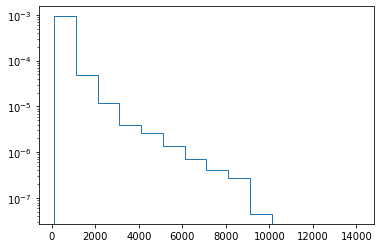

In [271]:

hdu = fits.open("/Users/breannacrompvoets/DAOPHOT/daophot4/f470n.fits")
# print(max(hdu[0].data.ravel()))
plt.hist(hdu[0].data.ravel(), bins=np.arange(100,15000,1000), density=True, histtype='step')
plt.yscale('log')

# Check roundness, sharpness, and sigma

In [225]:
filt = 'f470n'
print(filt)
cols = ['ID','x','y','Mag','Sigma','Modal_sky','Num_it','Chi','Sharp']
cols_coo = ['ID','x','y','Mag','Sharp','Round1', 'Round2']
dao_f = pd.read_csv(f"~/DAOPHOT/daophot4/{filt}.coo", header=None,delim_whitespace=True, skiprows=3, names=cols_coo)
dao_f.head()

f470n


,ID,x,y,Mag,Sharp,Round1,Round2
0,1,2194.15,16.37,-1.547,0.657,0.231,0.138
1,2,675.28,22.03,-0.045,0.634,0.025,-0.039
2,3,4008.68,25.03,-0.529,0.696,0.055,0.180
3,4,2190.42,25.51,-0.279,0.618,-0.057,0.189
4,5,88.93,28.50,-0.067,0.611,0.050,0.094


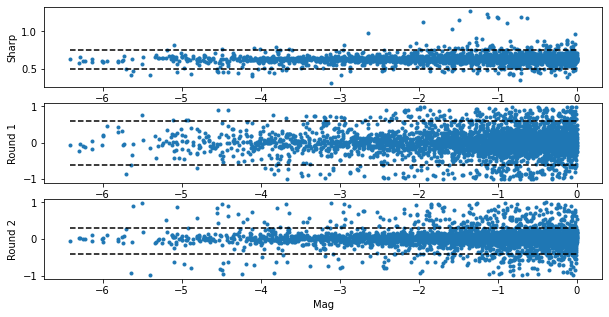

In [226]:
fig, axs = plt.subplots(3,1,figsize = (10,5))
axs[0].plot(dao_f.Mag,dao_f.Sharp,'.')
axs[0].set_ylabel('Sharp')
axs[0].set_xlabel('Mag')
axs[0].hlines(0.75,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[0].hlines(0.5,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')


axs[1].plot(dao_f.Mag,dao_f.Round1,'.')
axs[1].set_ylabel('Round 1')
axs[1].set_xlabel('Mag')
axs[1].hlines(0.6,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1].hlines(-0.6,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')


axs[2].plot(dao_f.Mag,dao_f.Round2,'.')
axs[2].set_ylabel('Round 2')
axs[2].set_xlabel('Mag')
axs[2].hlines(0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2].hlines(-0.4,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')

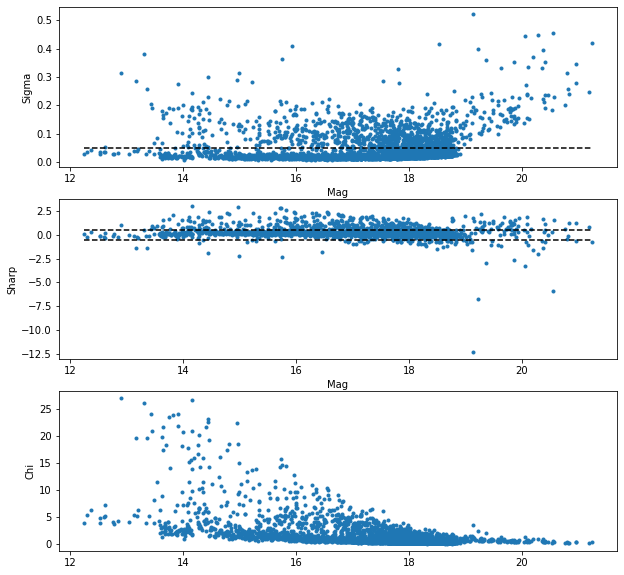

In [86]:
# dao_f = pd.read_csv(f"~/DAOPHOT/daophot4/1st_run/{filt}.als", header=None,delim_whitespace=True, skiprows=3, names=cols)


fig, axs = plt.subplots(3,1,figsize = (10,10))

axs[0].plot(dao_f.Mag,dao_f.Sigma,'.')
axs[0].set_ylabel('Sigma')
axs[0].set_xlabel('Mag')
axs[0].hlines(0.05,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1].plot(dao_f.Mag,dao_f.Sharp,'.')
axs[1].set_ylabel('Sharp')
axs[1].set_xlabel('Mag')
axs[1].hlines(0.5,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1].hlines(-0.5,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2].plot(dao_f.Mag,dao_f.Chi,'.')
axs[2].set_ylabel('Chi')
# plt.savefig('./Figures/run_1_allstar_f470n.png',dpi=300)

# Find good threshold

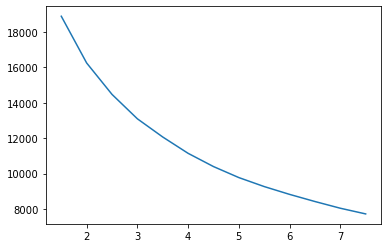

In [200]:
thresh = np.arange(1.5,8,0.5)
numstars = [18885,16246,14473,13096,12068,11147,10400,9778,9271,8830,8427,8048,7727]#[11392,9426,8107,7146,6442,5845,5377,4989,4694,4345,4094,3908]#[7183, 6180, 5487, 4993, 4593, 4278, 4038, 3849, 3650, 3462, 3324, 3179,3054, 2943]
plt.plot(thresh,numstars)

In [235]:
hdu